# Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Read the Data from the CSV

In [2]:
dummy_df = pd.read_csv(r"E:\Data\Machine learning\bank.csv", na_values =['NA'])
temp = dummy_df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [3]:
dummy_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
dummy_df.drop(['contact'], axis=1, inplace=True)

In [5]:
dummy_df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,8,may,9,2,172,5,failure,no


# Data Pre-processing

In [6]:
df= dummy_df

In [7]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()

    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

encoded_df=preprocessor(df)

In [8]:
encoded_df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,day_of_week
0,59,0,1,1,0,2343,1,0,5,8,1042,1,-1,0,3,1,4
1,56,0,1,1,0,45,0,0,5,8,1467,1,-1,0,3,1,4
2,41,9,1,1,0,1270,1,0,5,8,1389,1,-1,0,3,1,4
3,55,7,1,1,0,2476,1,0,5,8,579,1,-1,0,3,1,4
4,54,0,1,2,0,184,0,0,5,8,673,2,-1,0,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,20,0,257,1,-1,0,3,0,19
11158,39,7,1,1,0,733,0,0,16,6,83,4,-1,0,3,0,15
11159,32,9,2,1,0,29,0,0,19,1,156,2,-1,0,3,0,18
11160,43,9,1,1,0,0,0,1,8,8,9,2,172,5,0,0,7


In [9]:
x= encoded_df.drop(['default'],axis=1).values
y= encoded_df['default'].values

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

# Build the Descision tree model

In [11]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2, criterion='gini')
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.(x_test)[:, 1]

Training score:  0.9856646880949714
Testing score:  0.9829825347066726


In [12]:
# Decision tree with max_depth=3, min_samples_leaf=4, min_samples_split=3
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=3, min_samples_leaf=4, min_samples_split=3, criterion='gini')
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.9856646880949714
Testing score:  0.9829825347066726


In [13]:
# Decision tree with max_depth=4, min_samples_leaf=4, min_samples_split=3
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_leaf=4, min_samples_split=3, criterion='gini')
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.9856646880949714
Testing score:  0.9829825347066726


In [14]:
# Decision tree with, max_depth=5, min_samples_leaf=3, min_samples_split=2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_leaf=3, min_samples_split=2, criterion='gini')
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.9857766827192295
Testing score:  0.9834303627407076


In [15]:
# Decision tree with, max_depth=3, min_samples_leaf=3, min_samples_split=3
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_leaf=2, min_samples_split=2, criterion='gini')
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.9857766827192295
Testing score:  0.9834303627407076


### max_depth=5, min_samples_leaf=3, min_samples_split=2

# Performance matrix


In [16]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt= auc(fpr_dt, tpr_dt)

In [17]:
predictions = model_dt_2.predict(x_test)
predictions

array([0, 1, 0, ..., 0, 0, 0])

# Area under the curve

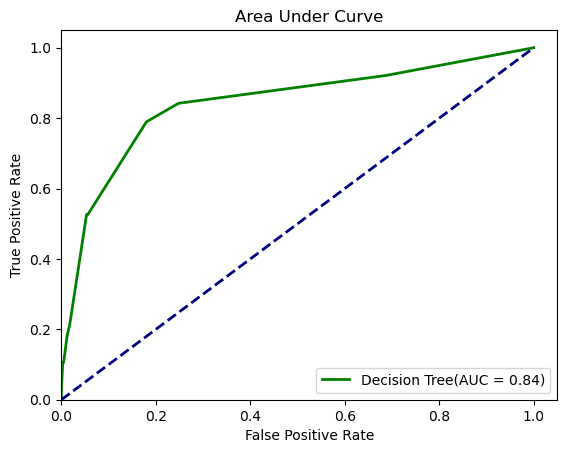

In [18]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

In [19]:
print (confusion_matrix(y_test, predictions))

[[2195    0]
 [  37    1]]


## Hyper-Parameter Optimization using GridSearchCV

In [20]:
fit_model=DecisionTreeClassifier(random_state=1)

In [21]:
from sklearn.model_selection import GridSearchCV
import time
start= time.time()
param_dist = {'max_depth': [2,3,4],
              'min_samples_leaf':[3,4,5],
              'min_samples_split':[2,3,4,5], 
              'criterion':['gini']
             }

cv_rf = GridSearchCV(fit_model, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}
Time taken in grid search:  6.05


In [22]:
# Decision tree with, max_depth=5, min_samples_leaf=3, min_samples_split=2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2, min_samples_leaf=3, min_samples_split=2, criterion='gini')
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.9856646880949714
Testing score:  0.9829825347066726


# Performance matrix- Auc curve and Confusion matrix for Grid search parameters

In [23]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt= auc(fpr_dt, tpr_dt)

In [24]:
predictions = model_dt_2.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

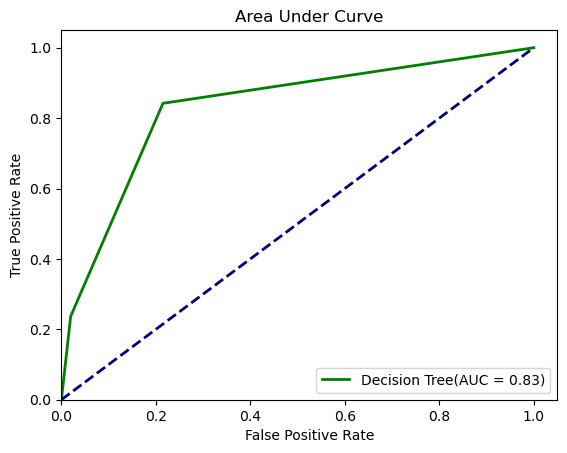

In [25]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
print (confusion_matrix(y_test, predictions))

[[2195    0]
 [  38    0]]


In [27]:
y_pred_dt

array([0.00401779, 0.03791737, 0.00401779, ..., 0.03791737, 0.00401779,
       0.00401779])

In [29]:
y_pred_dt=model_dt_2.predict_proba(x_test)

In [30]:
y_pred_dt

array([[0.99598221, 0.00401779],
       [0.96208263, 0.03791737],
       [0.99598221, 0.00401779],
       ...,
       [0.96208263, 0.03791737],
       [0.99598221, 0.00401779],
       [0.99598221, 0.00401779]])

In [37]:
y_pred_dt[:, 1]

array([0.00401779, 0.03791737, 0.00401779, ..., 0.03791737, 0.00401779,
       0.00401779])